In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Harshit Saini\\Downloads\\energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
simple_linear_reg_df = df[['T2', 'T6']].sample(15, random_state=2)

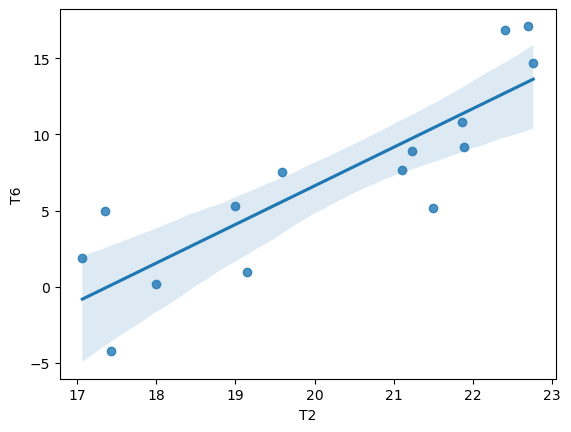

In [4]:
sns.regplot(x="T2", y="T6",
data=simple_linear_reg_df);

In [5]:
from sklearn.metrics import r2_score
r2_score = r2_score(df['T6'], df['T2'])
round(r2_score, 3 )

-3.718

In [6]:
df['T2'].corr(df['T6'])

0.8011860477351995

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = df.drop(columns=[ 'date' , 'lights' ])
normalised_df = pd.DataFrame(scaler.fit_transform(model), columns=model.columns)
features_df = normalised_df.drop(columns=[ 'Appliances'])
appliance_target = normalised_df[ 'Appliances' ]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, appliance_target,
test_size= 0.3 , random_state= 42 )

In [10]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2 )

0.05

In [11]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2 )

45.35

In [12]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3 )

0.088

In [13]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2 )

0.15

In [14]:
def get_weights_df(model, feat, col_name) :
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = [ 'Features' , col_name]
    weights_df[col_name].round( 3 )
    return weights_df

In [15]:
get_weights_df(linear_model, x_train, 'Linear_Model_Weight' )

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [16]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.4 )
ridge_reg.fit(x_train, y_train)
predicted_values = ridge_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3 )

0.088

In [17]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.001 )
lasso_reg.fit(x_train, y_train)
get_weights_df(lasso_reg, x_train, 'Lasso_weight' )

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [18]:
predicted_values = lasso_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3 )

0.094